In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('UT_Data_Complex/smartphoneatwrist.csv',header=None)

#### Time stamp, accelerometer(x,y,z), linear acceleration sensor(x,y,z), gyroscope (x,y,z), Magnetometer (x,y,z), Activity Label(11111,11112, etc)
### Activity Label code: 
#### walk	11111
#### stand	11112
#### jog	11113
#### sit	11114
#### bike	11115
#### upstairs 11116
#### downstairs 11117
#### type	11118
#### write	11119
#### coffee	11120
#### talk	11121
#### smoke	11122
#### eat	11123

In [7]:
act_map = {1:'walk',2:'stand',3:'jog',4:'sit',5:'bike',6:'upstairs',7:'downstairs',8:'type',9:'write',10:'coffee',11:'talk',12:'smoke',13:'eat'}
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.390000e+12,4.4266,-7.0281,1.30760,-1.160500,1.02760,1.06290,-0.136220,0.153940,-0.132560,-15.12,30.18,19.44,11111
1,1.390000e+12,4.7126,-8.5127,1.59360,-0.892800,-0.47052,1.32460,-0.059559,0.262670,-0.076053,-16.38,30.00,18.84,11111
2,1.390000e+12,5.0531,-9.4389,1.48460,-0.549560,-1.39610,1.17840,-0.054978,0.293520,0.097128,-16.86,29.94,18.48,11111
3,1.390000e+12,5.4890,-10.1610,1.10320,-0.069071,-2.08950,0.73832,-0.028405,0.244040,0.154550,-18.00,30.00,17.82,11111
4,1.390000e+12,5.5707,-10.4740,0.78998,0.061460,-2.37040,0.40278,0.021075,0.042761,0.321930,-18.54,30.06,17.58,11111


In [8]:
#1 和 3 加速度传感器数据和陀螺仪
df_data = df.loc[:,[1,2,3,7,8,9,13]]
df_data.loc[:,13] = df_data.loc[:,13]-11110
labels = df_data[13]
df_data = df_data.rename(columns={7:4,8:5,9:6,13:7})

df_data.head()

,1,2,3,4,5,6,7
0,4.4266,-7.0281,1.30760,-0.136220,0.153940,-0.132560,1
1,4.7126,-8.5127,1.59360,-0.059559,0.262670,-0.076053,1
2,5.0531,-9.4389,1.48460,-0.054978,0.293520,0.097128,1
3,5.4890,-10.1610,1.10320,-0.028405,0.244040,0.154550,1
4,5.5707,-10.4740,0.78998,0.021075,0.042761,0.321930,1


## 数据标准化

In [10]:
avg_data_sensor = np.zeros(6)
std_data_sensor = np.zeros(6)
for i in range(6):
    avg_data_sensor[i] = np.mean(df_data.loc[:,i+1].values)
    std_data_sensor[i] = np.std(df_data.loc[:,i+1].values)
for i in range(1,7):
    df_data.loc[:,i] = (df_data.loc[:,i]-avg_data_sensor[i-1])/std_data_sensor[i-1]
df_data.head()

,1,2,3,4,5,6,7
0,-0.203104,-0.606604,1.330241,-0.164872,0.177112,-0.132202,1
1,-0.127677,-0.852985,1.406681,-0.061466,0.317411,-0.079530,1
2,-0.037876,-1.006695,1.377548,-0.055287,0.357218,0.081898,1
3,0.077085,-1.126533,1.275610,-0.019444,0.293372,0.135423,1
4,0.098632,-1.178478,1.191894,0.047298,0.033654,0.291444,1


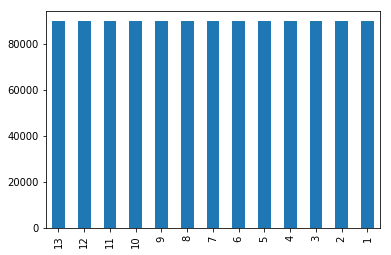

In [9]:
labels.value_counts().plot(kind='bar')

In [11]:
def plot_activity(activity, df_data):
    data_ac = df_data[df_data.loc[:,7]==activity][[1,2,3]][:200]
    data_gy = df_data[df_data.loc[:,7]==activity][[4,5,6]][:200]
    axis_ac = data_ac.plot(subplots=True, figsize=(16, 12),title=act_map[activity])
    axis_gy = data_gy.plot(subplots=True, figsize=(16, 12),title=act_map[activity])
#     data = df[df['activity'] == activity][['x-axis', 'y-axis', 'z-axis']][:200]
#     axis = data.plot(subplots=True, figsize=(16, 12), 
#                      title=activity)
    for ax in axis_ac:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
    for ax in axis_gy:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
        

c:\python\python37\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


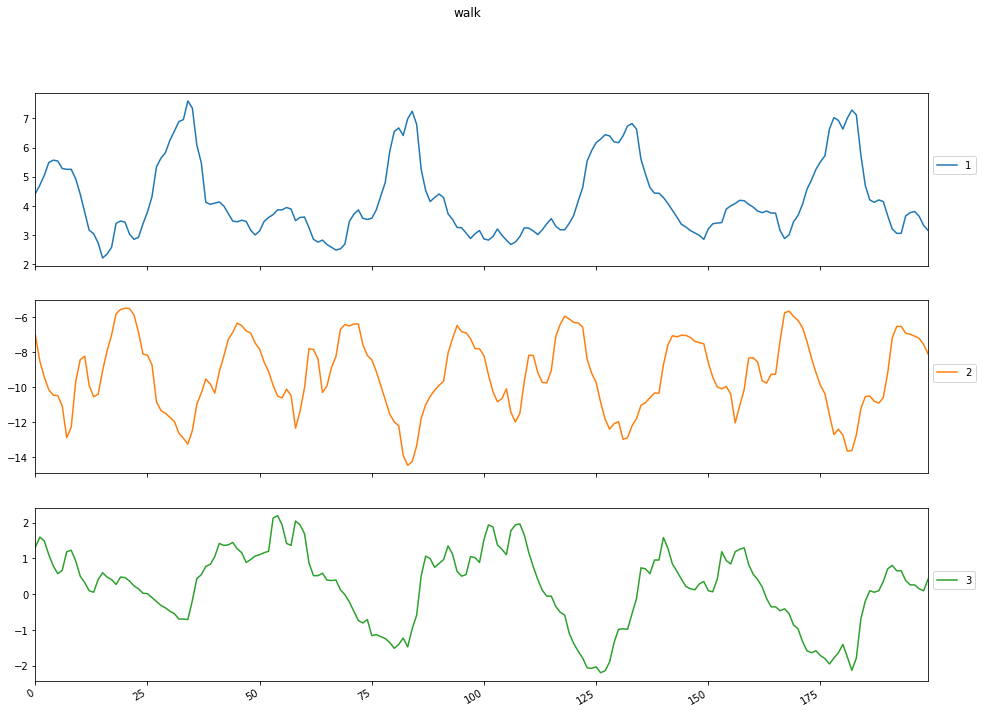

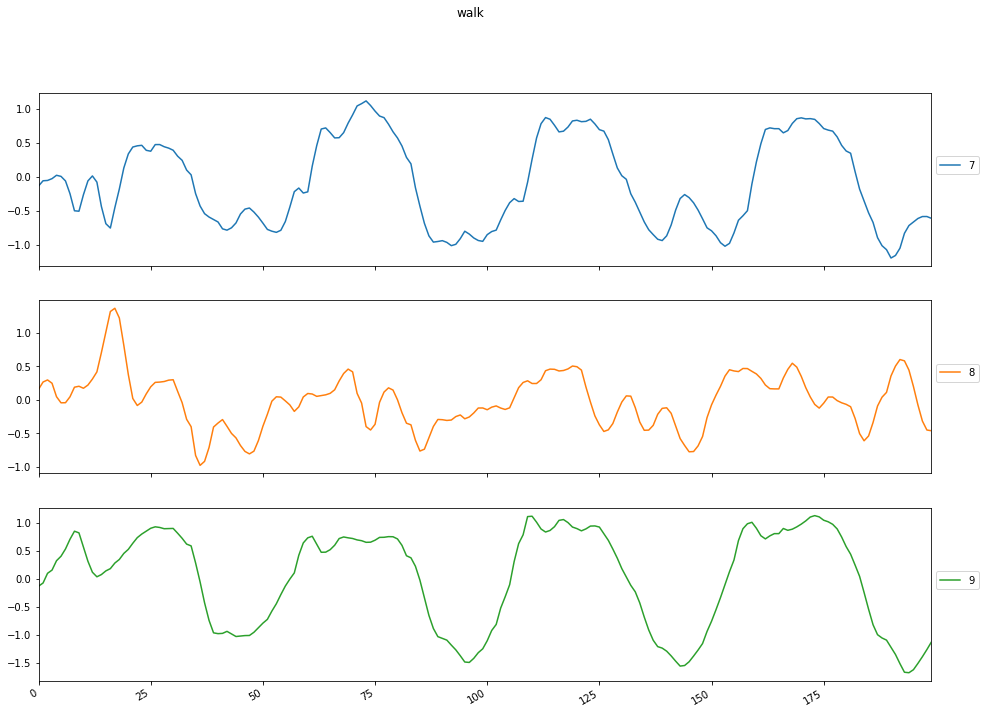

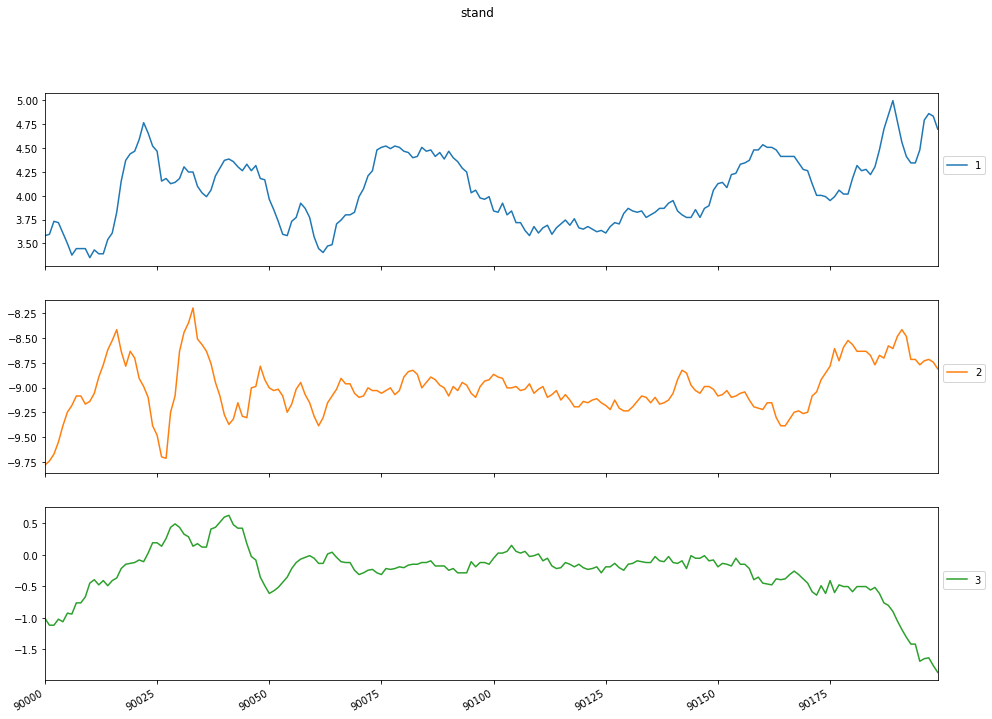

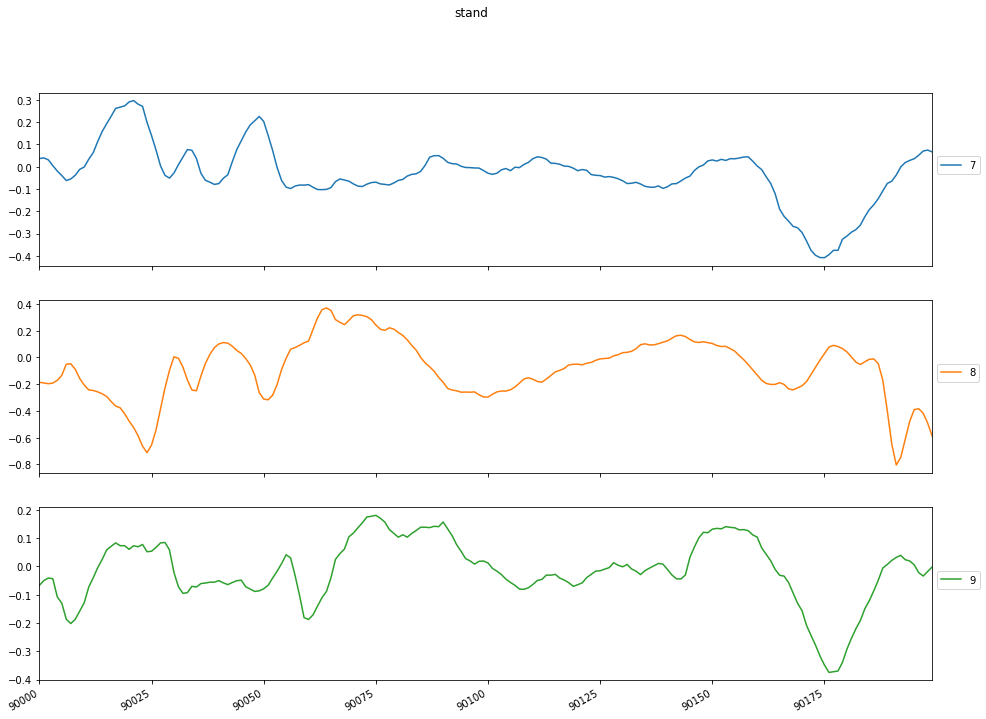

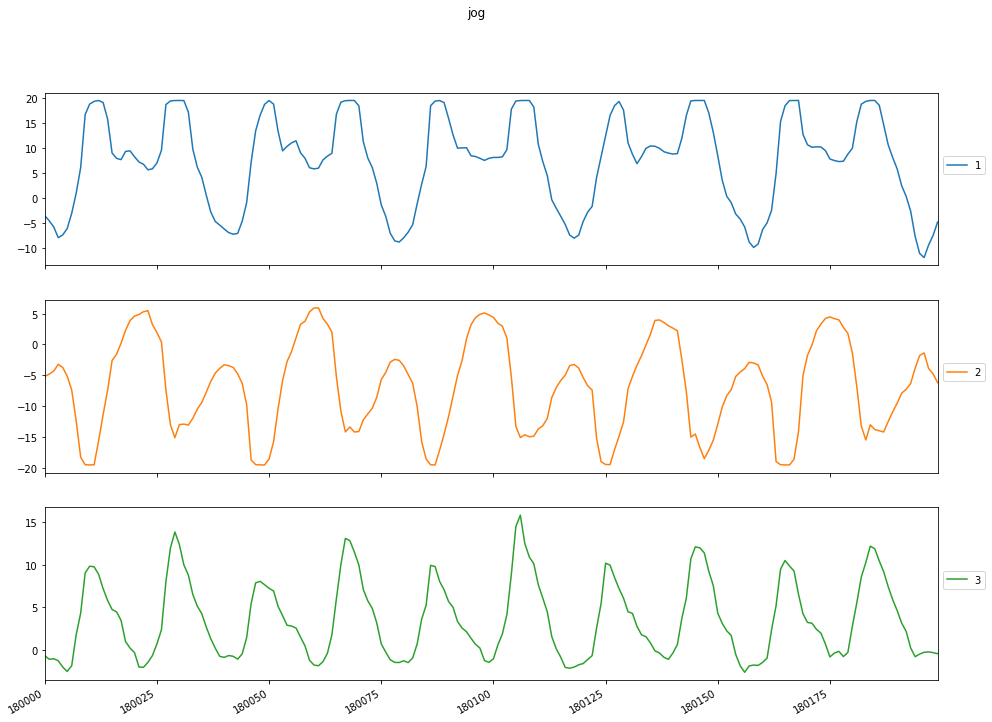

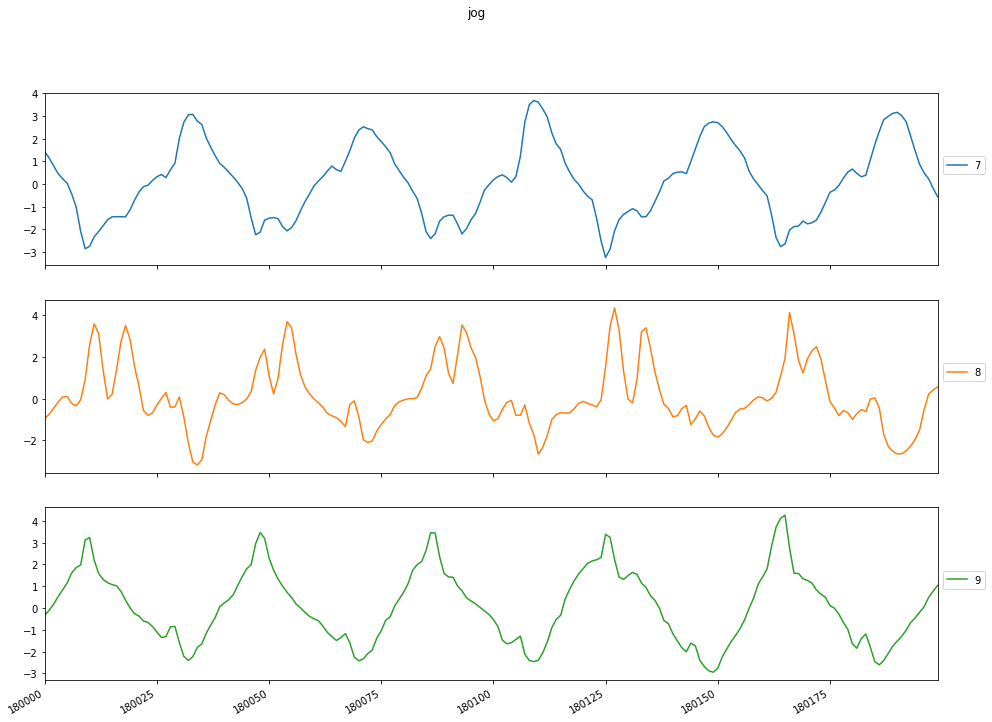

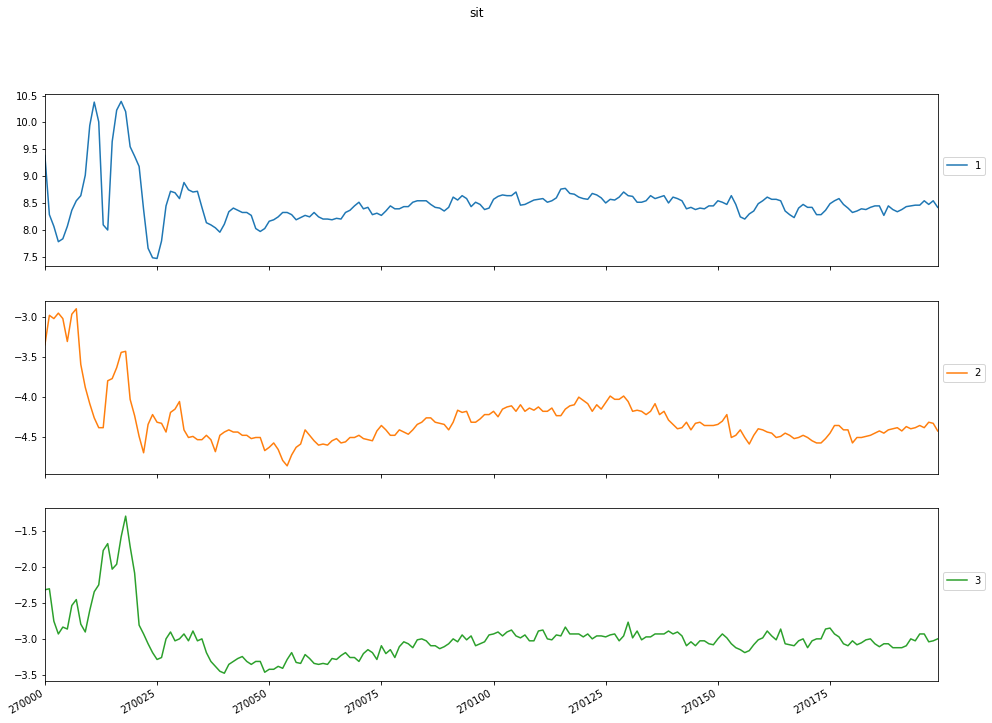

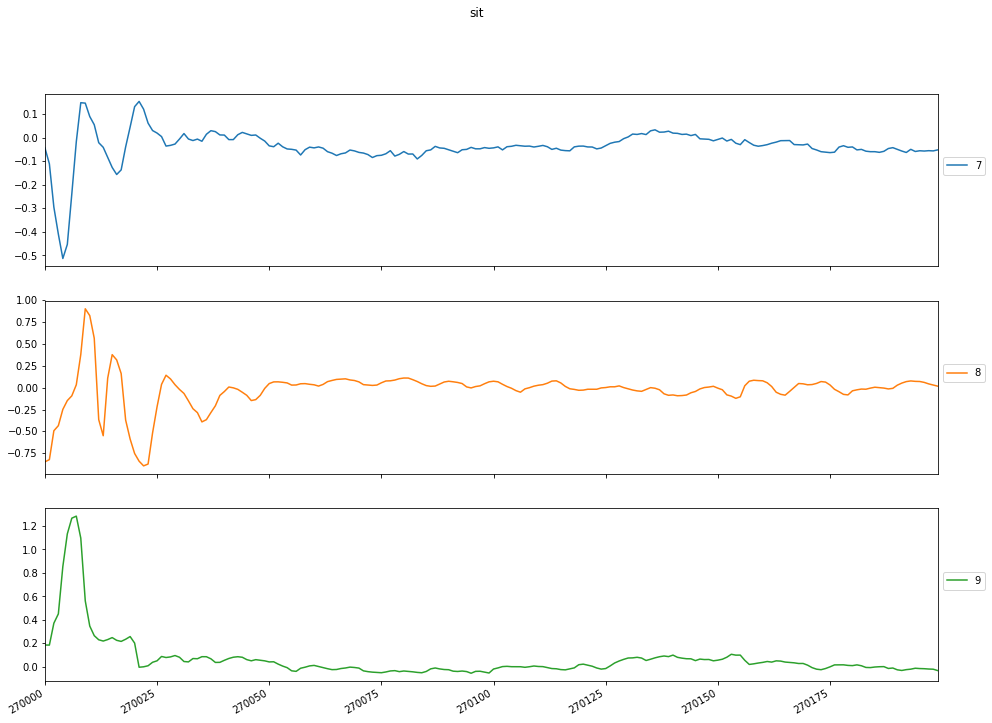

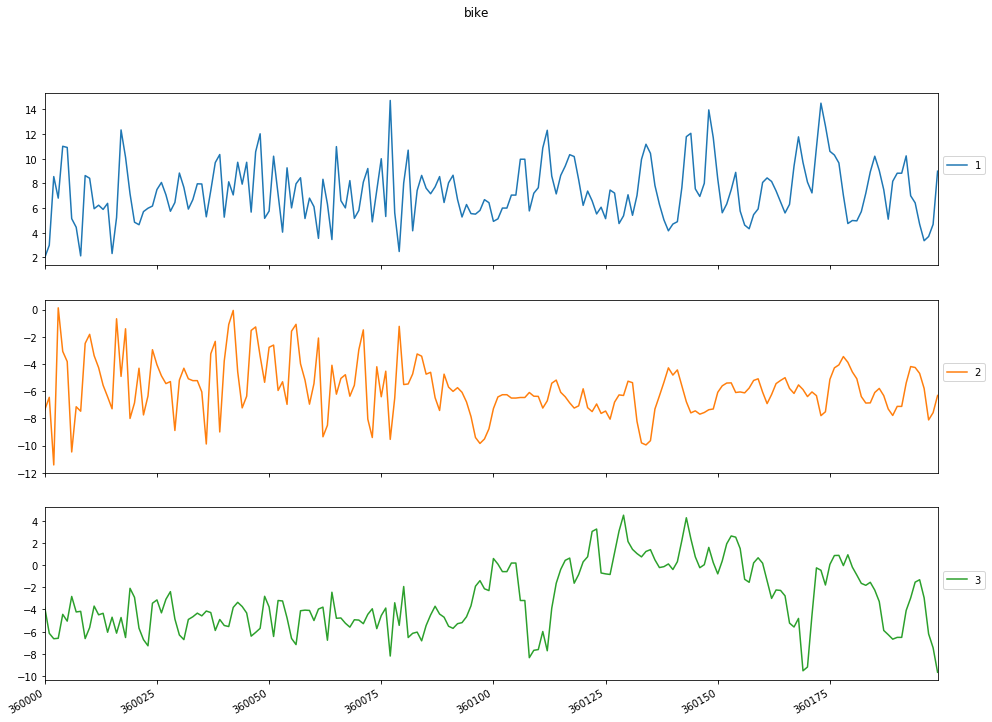

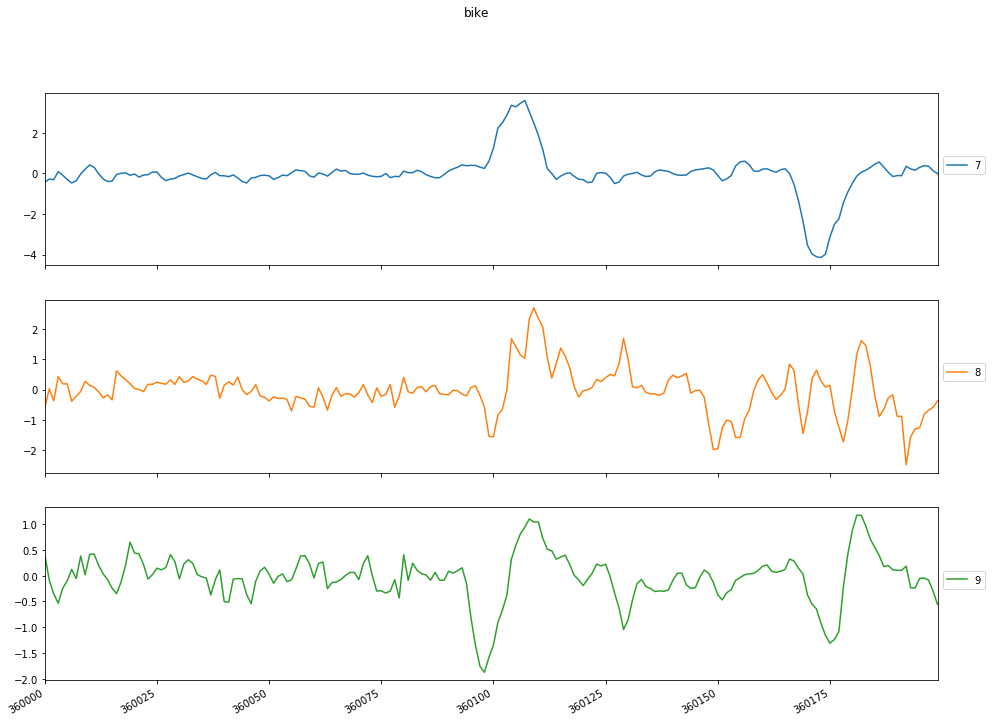

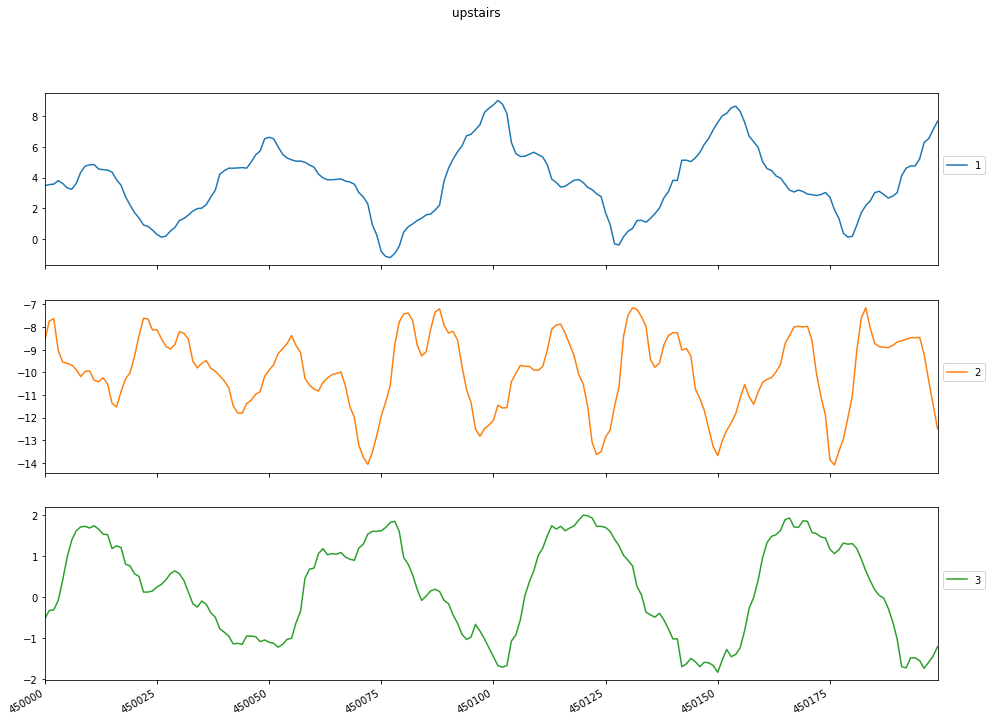

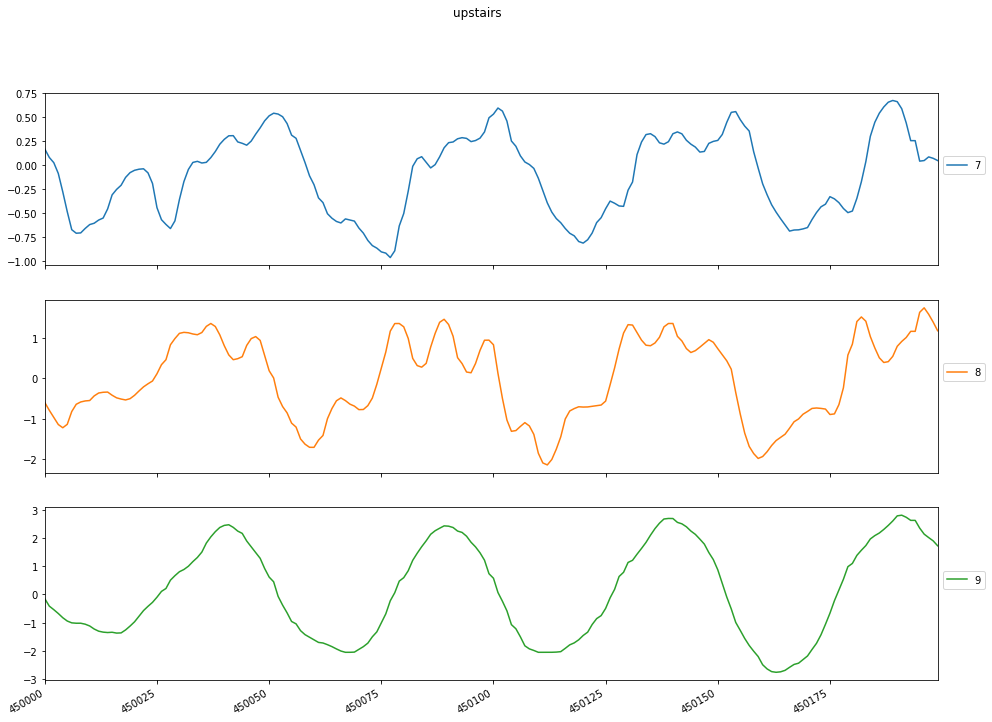

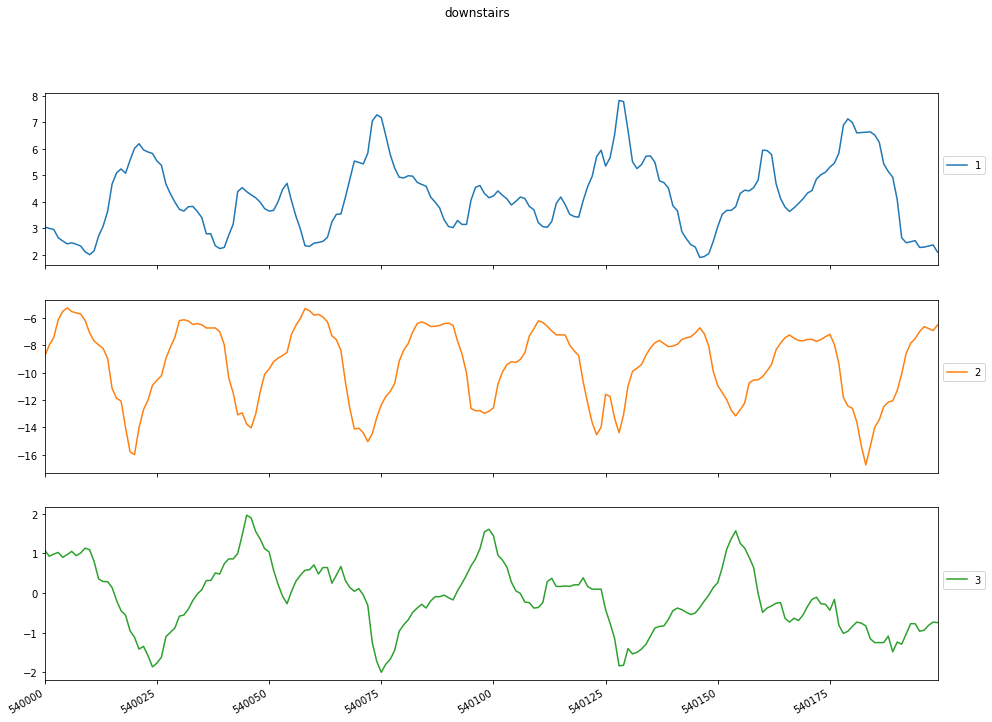

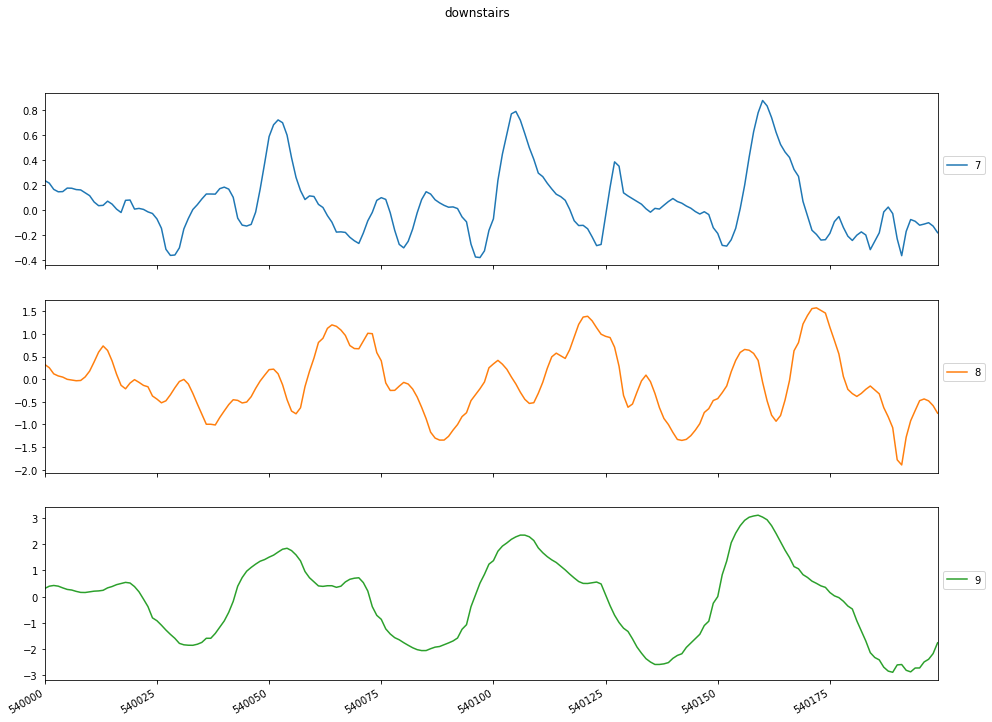

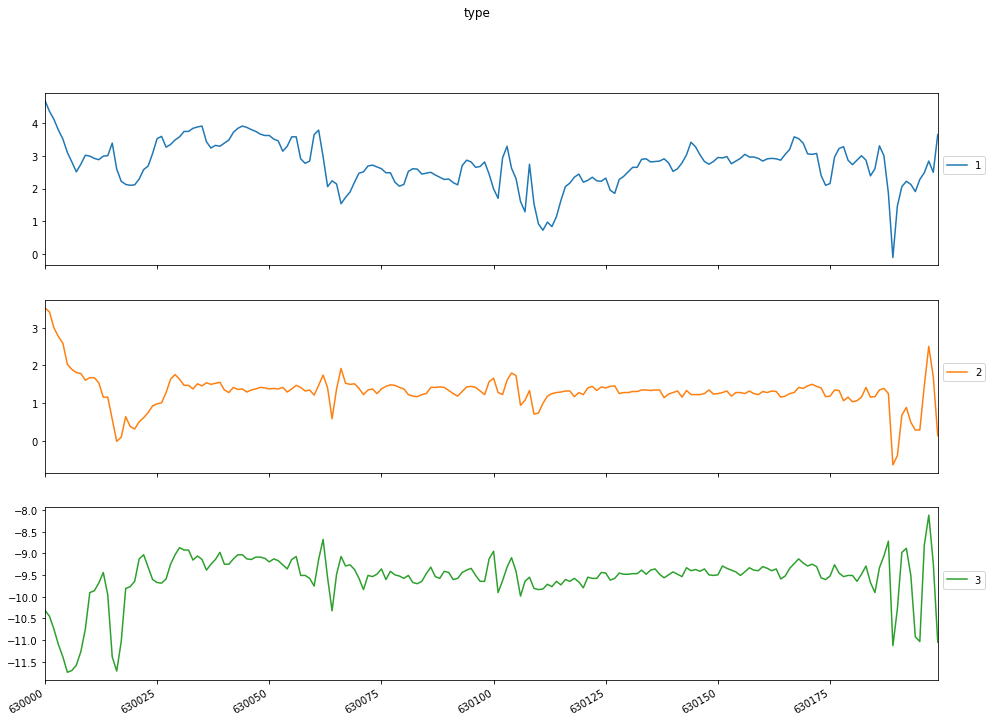

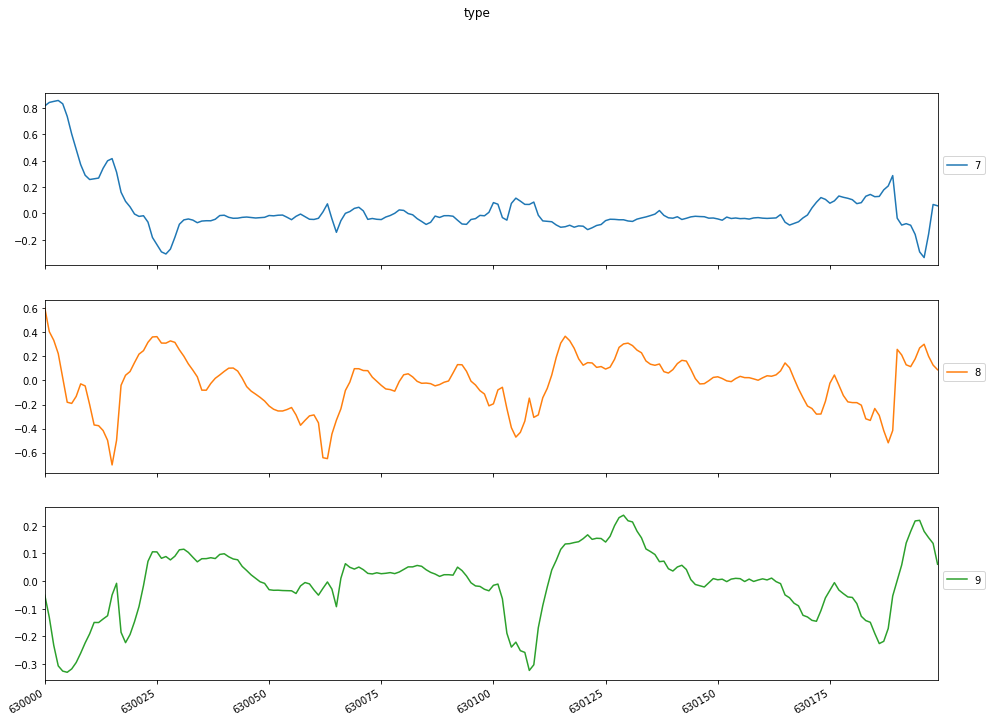

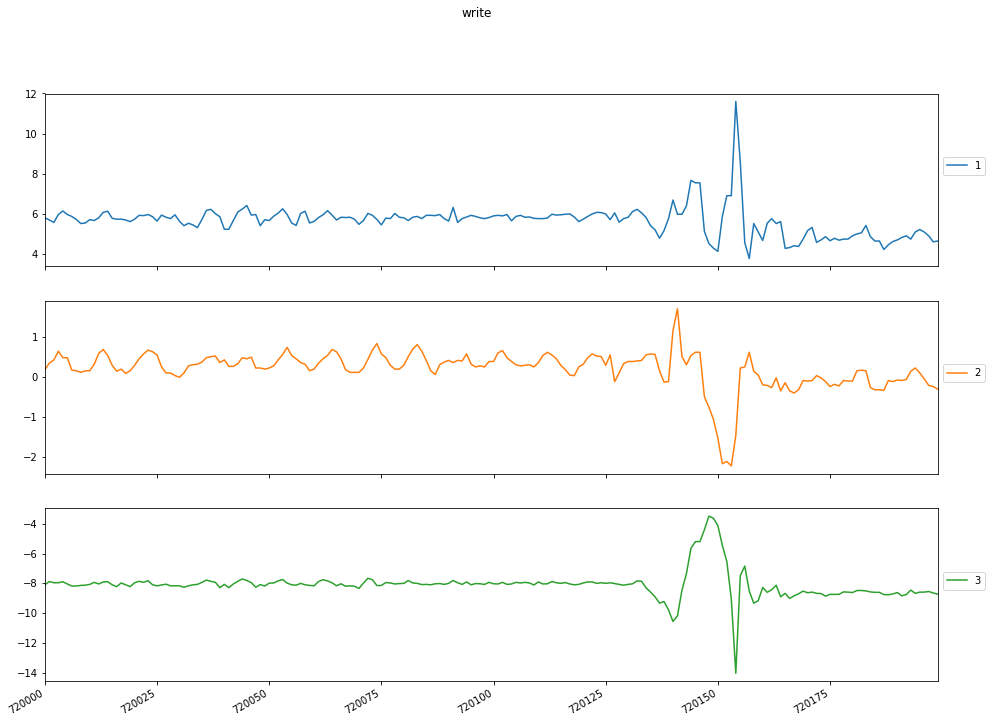

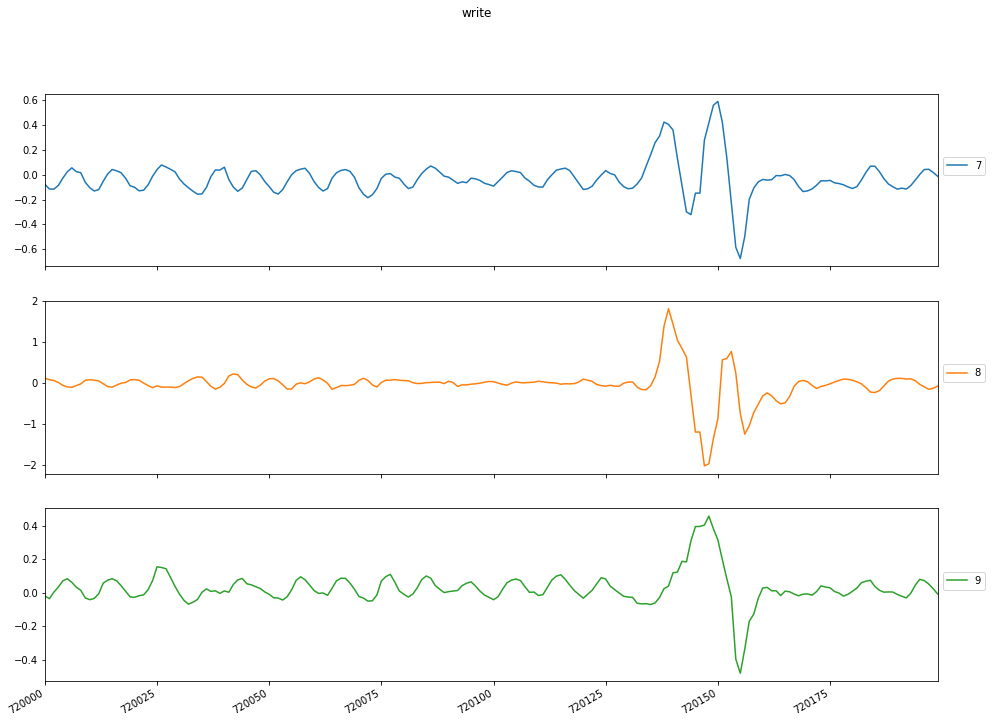

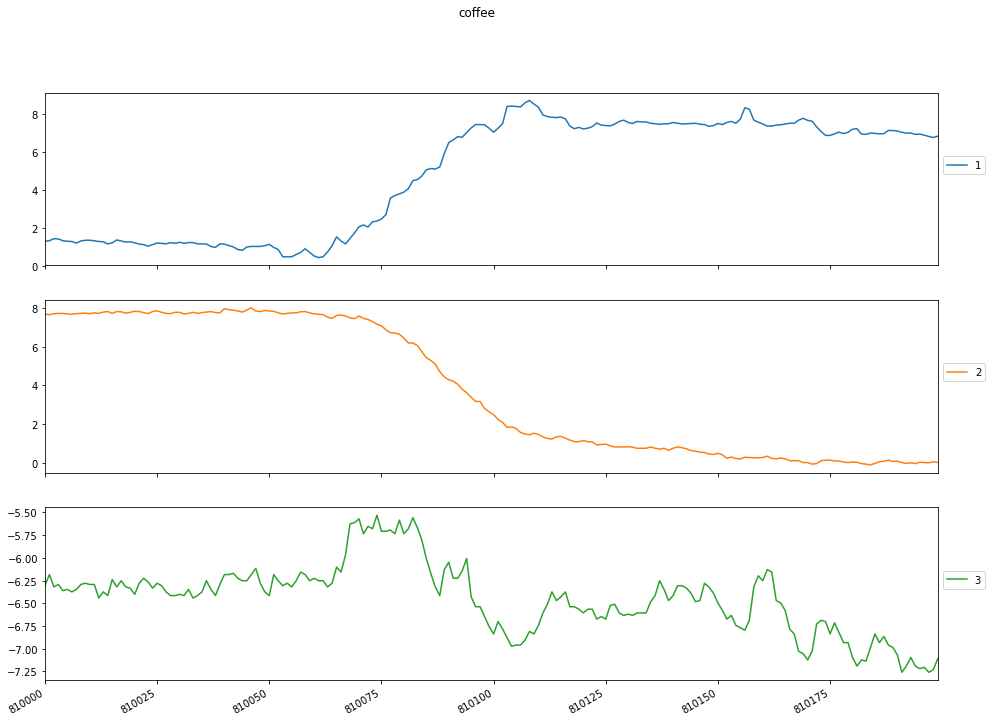

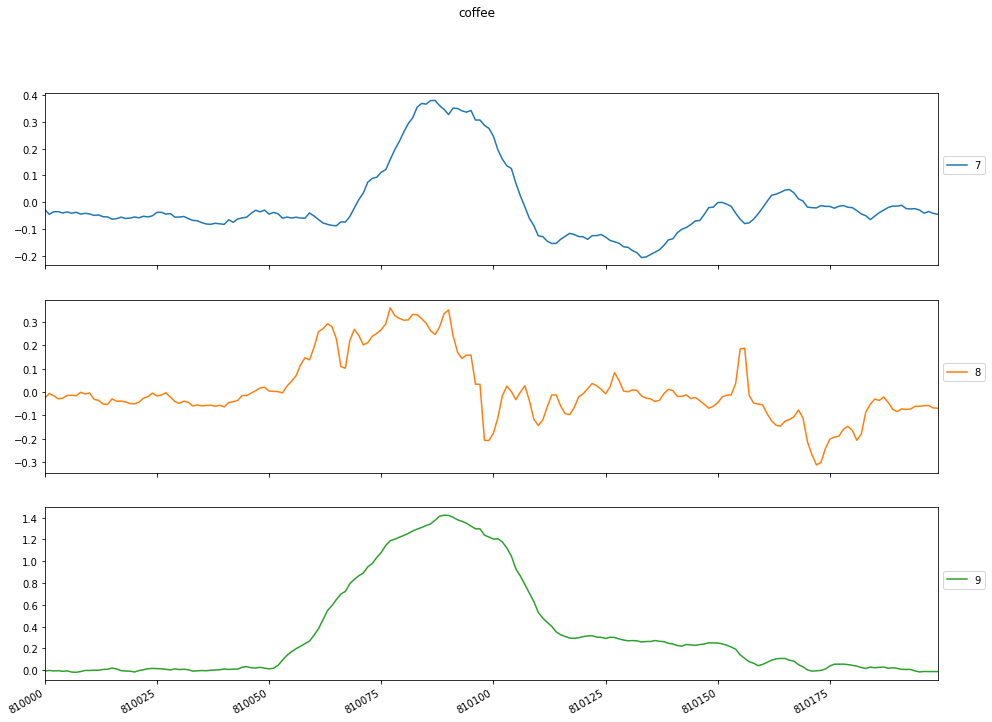

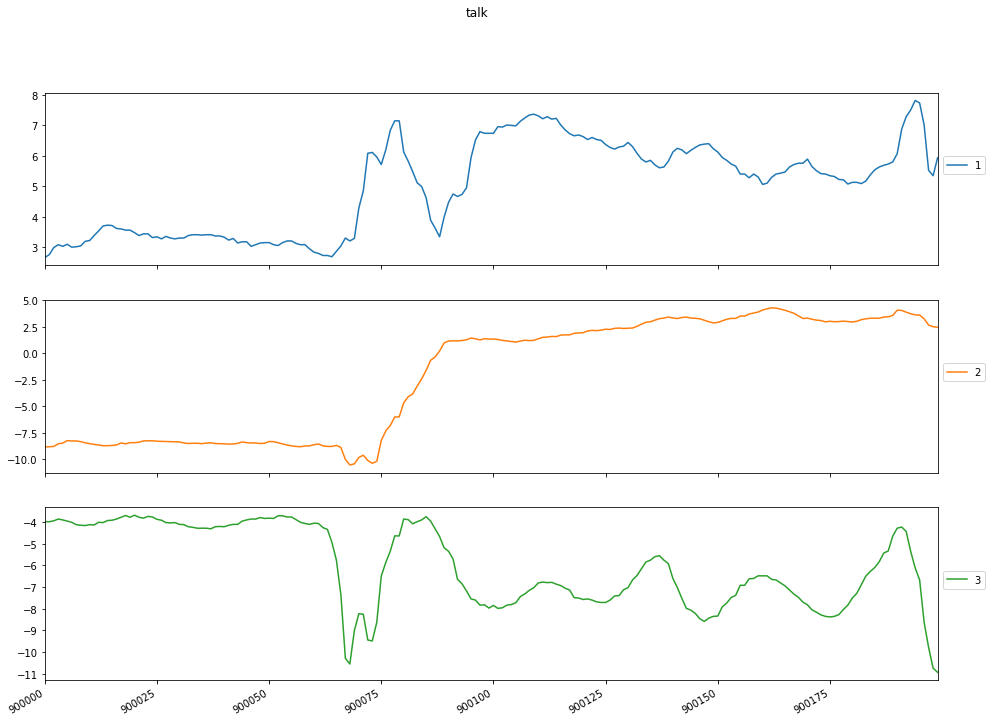

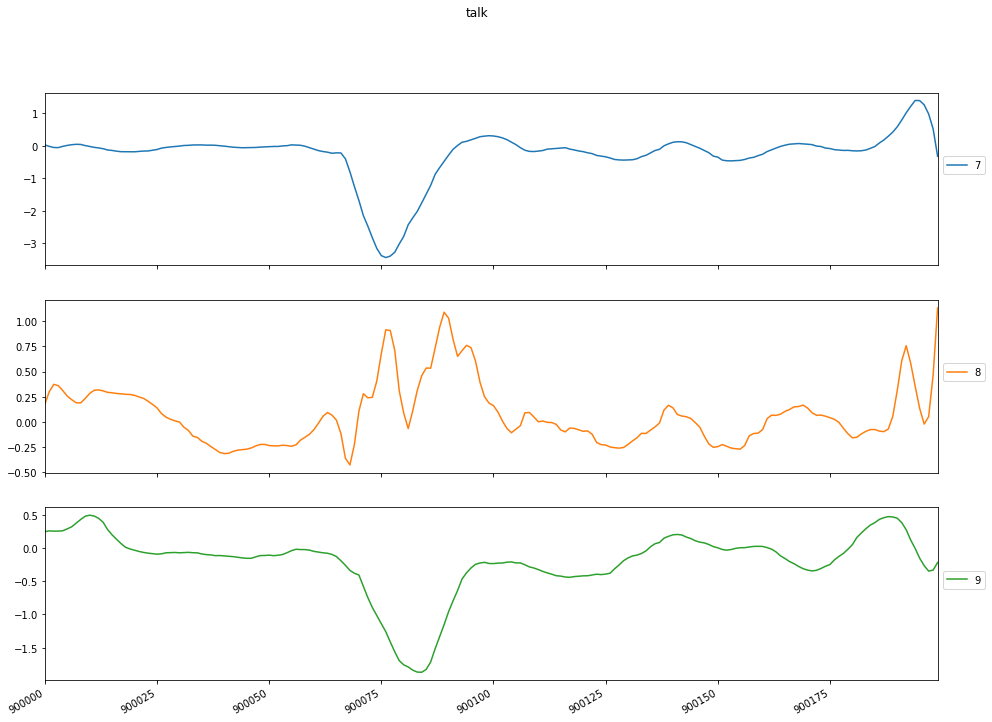

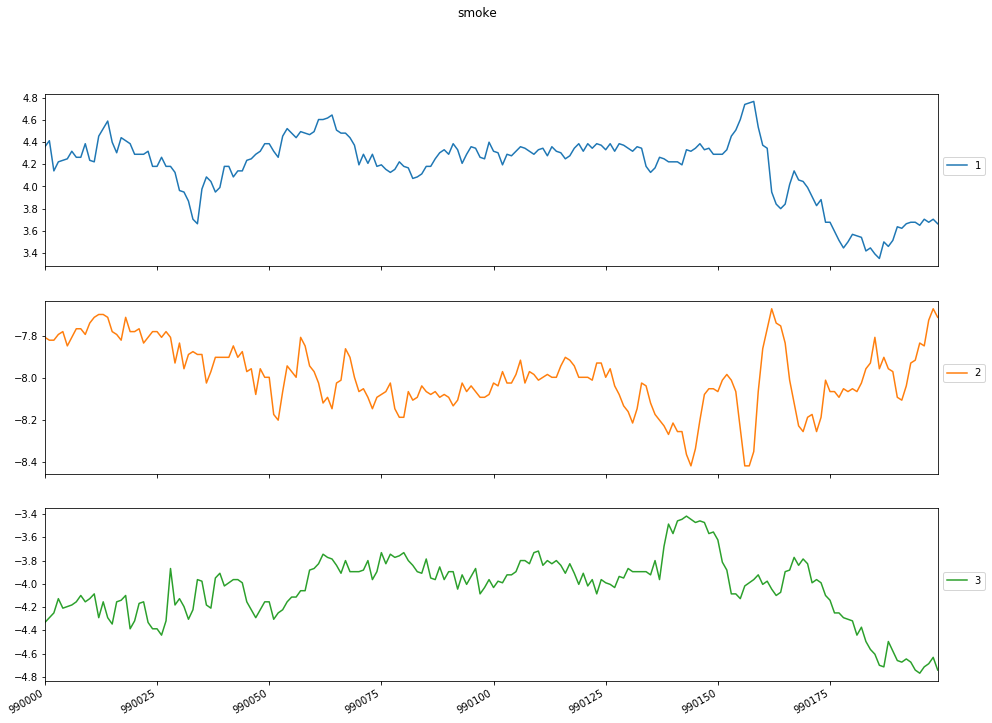

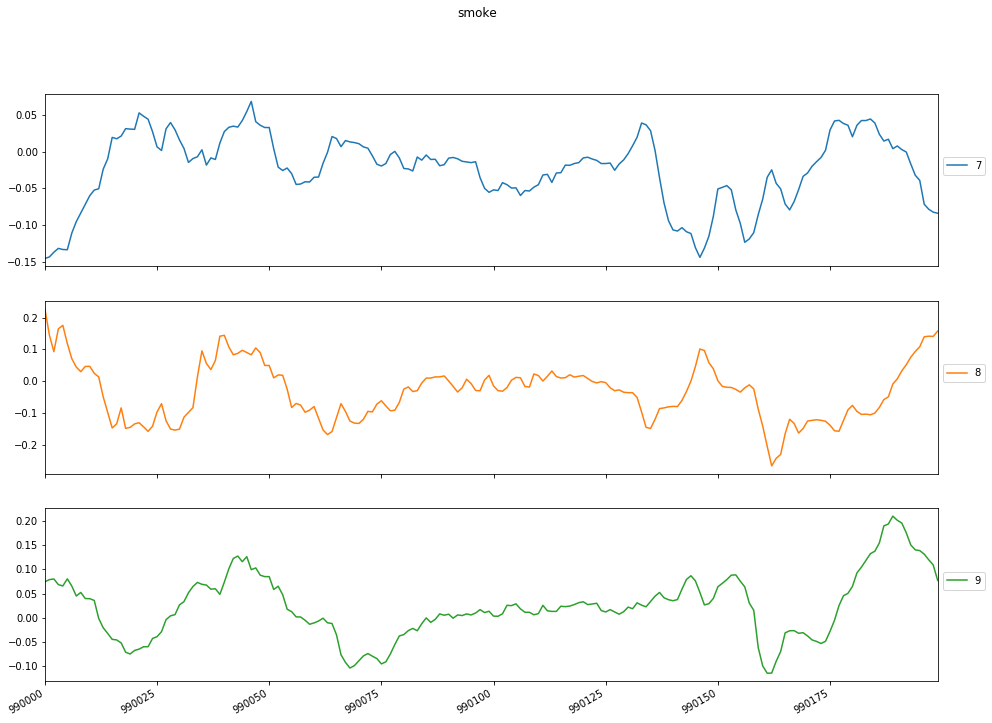

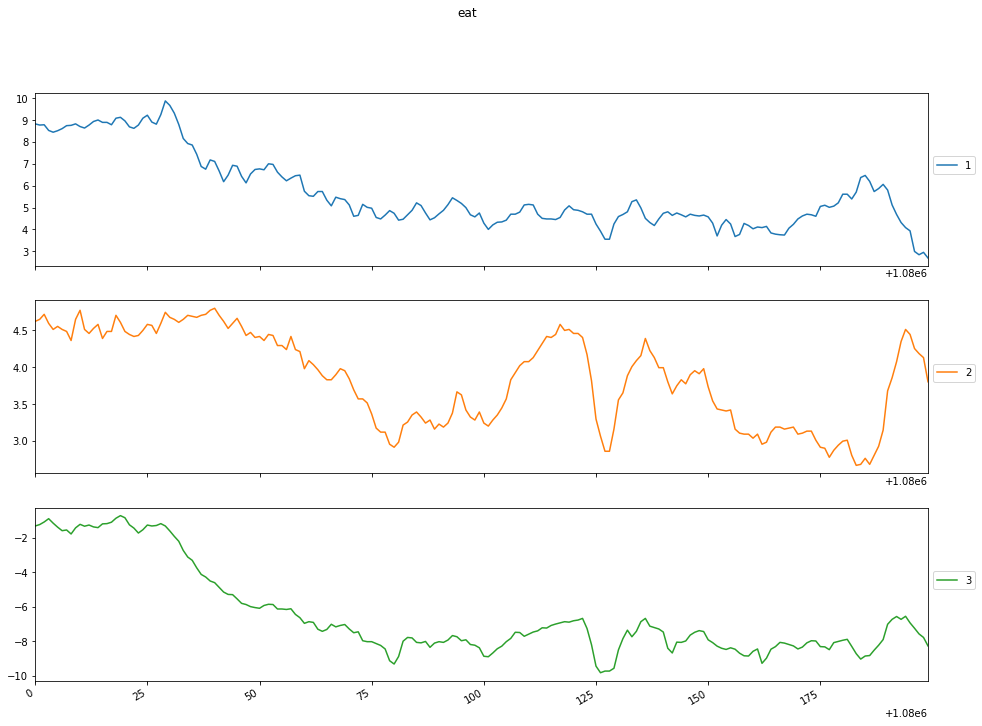

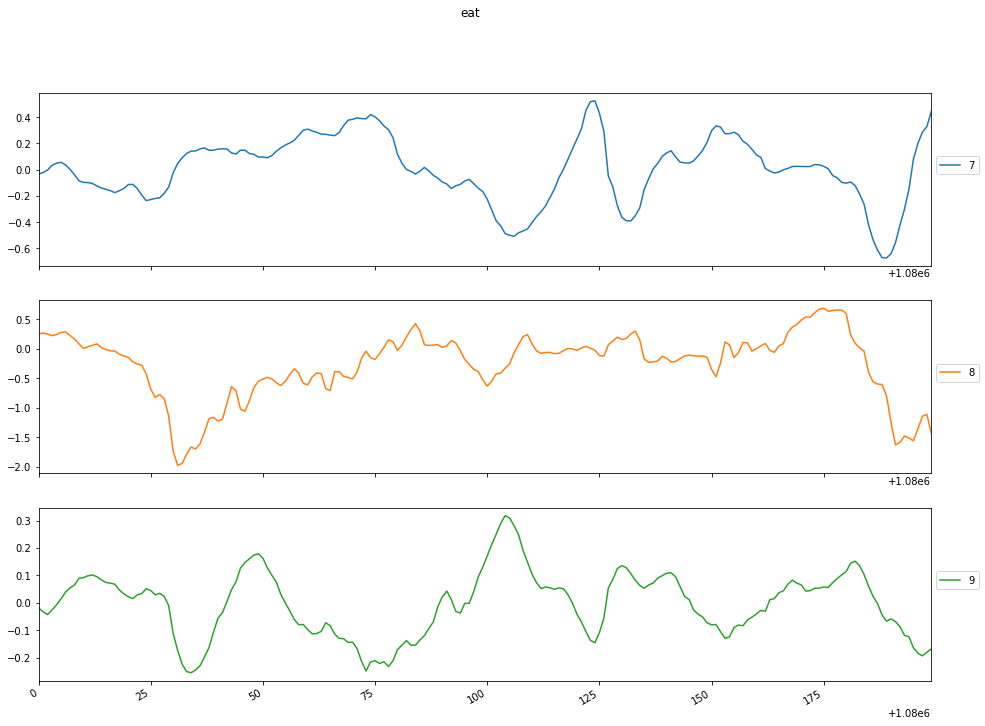

In [8]:
for i in range(1,14):
    plot_activity(i,df_data)

In [12]:
N_TIME_STEPS = 200
N_FEATURES = 6
step = int(N_TIME_STEPS/2)
segments = []
labels = []
for k in range(13):
    for i in range(0+k*90000, 90000*(k+1) - N_TIME_STEPS, step):
        xs_ac = df_data[1].values[i: i + N_TIME_STEPS]
        ys_ac = df_data[2].values[i: i + N_TIME_STEPS]
        zs_ac = df_data[3].values[i: i + N_TIME_STEPS]
        xs_gy = df_data[4].values[i: i + N_TIME_STEPS]
        ys_gy = df_data[5].values[i: i + N_TIME_STEPS]
        zs_gy = df_data[6].values[i: i + N_TIME_STEPS]
#         label = stats.mode(df['activity'][i: i + N_TIME_STEPS])[0][0]
        segments.append([xs_ac, ys_ac, zs_ac,xs_gy,ys_gy,zs_gy])
        labels.append(k+1)

In [15]:
np.array(segments).shape
# len(labels)
# reshaped_segments.shape

(11674, 6, 200)

In [16]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

In [17]:
reshaped_segments.shape
labels.shape

(11674, 13)

In [26]:
from sklearn.model_selection import train_test_split
RANDOM_SEED = 1234
n_hidden = 32
timesteps = N_TIME_STEPS
input_dim = 6
n_classes = 8
batch_size = 16
epochs = 20
X_train, X_test, y_train, y_test = train_test_split(
        reshaped_segments, labels, test_size=0.2, random_state=RANDOM_SEED)

In [24]:
from keras.models import Sequential,Model
from keras.layers import LSTM,Bidirectional,GRU,Input
from keras.layers.core import Dense, Dropout
from keras.optimizers import RMSprop,Adam
def getModel():
    model = Sequential()
    model.add(Bidirectional(LSTM(n_hidden, input_shape=(timesteps, input_dim),return_sequences=True)))
    model.add(Bidirectional(GRU(16)))
    model.add(Dropout(0.2))
    model.add(Dense(n_classes, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model

Using TensorFlow backend.


In [14]:


model = getModel()
model.fit(X_train,
          y_train,
          batch_size=batch_size,
          validation_data=(X_test, y_test),
          epochs=epochs)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 9339 samples, validate on 2335 samples
Epoch 1/20
9339/9339 [==============================] - 68s 7ms/step - loss: 1.7233 - acc: 0.4143 - val_loss: 1.1528 - val_acc: 0.6184
Epoch 2/20
9339/9339 [==============================] - 72s 8ms/step - loss: 1.0546 - acc: 0.6087 - val_loss: 0.8368 - val_acc: 0.7096
Epoch 3/20
9339/9339 [==============================] - 68s 7ms/step - loss: 0.8359 - acc: 0.7040 - val_loss: 0.7241 - val_acc: 0.7627
Epoch 4/20
9339/9339 [==============================] - 66s 7ms/step - loss: 0.7207 - acc: 0.7536 - val_loss: 0.5965 - val_acc: 0.8047
Epoch 5/20
9339/9339 [==============================] - 65s 7ms/step - loss: 0.6131 - acc: 0.7885 - val_loss: 0.5161 - val_acc: 0.8266
Epoch 6/20
9339/9339 [====================

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 200, 64)           9984      
_________________________________________________________________
bidirectional_2 (Bidirection (None, 32)                7776      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 13)                429       
Total params: 18,189
Trainable params: 18,189
Non-trainable params: 0
_________________________________________________________________


In [16]:
# y_pred = model.predict(X_test)
# t = np.argmax(y_pred,axis=1)
# u = np.argmax(y_test,axis=1)
# o = np.where(t!=u)
# (1258-44)/1258

# print()

In [17]:
ACTIVITIES = {0:'walk',1:'stand',2:'jog',3:'sit',4:'bike',5:'upstairs',6:'downstairs',7:'type',8:'write',9:'coffee',10:'talk',11:'smoke',12:'eat'}

def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [18]:
conf = confusion_matrix(y_test, model.predict(X_test))
conf

Pred,bike,coffee,downstairs,eat,jog,sit,smoke,stand,talk,type,upstairs,walk,write
True,,,,,,,,,,,,,
bike,182,0,0,0,0,0,0,0,1,0,0,0,0
coffee,0,159,0,4,0,17,1,0,1,0,0,0,0
downstairs,0,0,177,0,0,0,1,0,0,0,0,1,0
eat,0,16,0,148,0,0,0,0,13,0,0,0,1
jog,0,0,1,0,179,0,0,0,0,0,0,0,0
sit,0,1,0,0,0,163,0,0,2,0,0,0,0
smoke,0,7,6,1,0,1,162,0,4,0,0,0,0
stand,0,0,0,0,0,0,12,168,2,0,1,0,0
talk,0,4,1,7,0,6,9,3,168,0,0,0,3


In [19]:
y_p = model.predict(X_test)

In [31]:
N_TIME_STEPS = 200
N_FEATURES = 6
step = int(N_TIME_STEPS/2)
segments = []
labels = []
# ACTIVITIES = {0:'walk',1:'stand',2:'jog',3:'sit',4:'bike',5:'upstairs',6:'downstairs',7:'type',8:'write',9:'coffee',10:'talk',11:'smoke',12:'eat'}
#coffee ,downstairs,eat,smoke,talk,upstairs,walk,write
#0 5 6 8 9 10 11 12    

# for i in range(0, 90000 - N_TIME_STEPS, step):
#     xs_ac = df_data[1].values[i: i + N_TIME_STEPS]
#     ys_ac = df_data[2].values[i: i + N_TIME_STEPS]
#     zs_ac = df_data[3].values[i: i + N_TIME_STEPS]
#     xs_gy = df_data[7].values[i: i + N_TIME_STEPS]
#     ys_gy = df_data[8].values[i: i + N_TIME_STEPS]
#     zs_gy = df_data[9].values[i: i + N_TIME_STEPS]
#     segments.append([xs_ac, ys_ac, zs_ac,xs_gy,ys_gy,zs_gy])
#     labels.append(1)
# for k in range(5,7):
#     for i in range(0+90000*k, 90000*(1+k) - N_TIME_STEPS, step):
#         xs_ac = df_data[1].values[i: i + N_TIME_STEPS]
#         ys_ac = df_data[2].values[i: i + N_TIME_STEPS]
#         zs_ac = df_data[3].values[i: i + N_TIME_STEPS]
#         xs_gy = df_data[7].values[i: i + N_TIME_STEPS]
#         ys_gy = df_data[8].values[i: i + N_TIME_STEPS]
#         zs_gy = df_data[9].values[i: i + N_TIME_STEPS]
#         segments.append([xs_ac, ys_ac, zs_ac,xs_gy,ys_gy,zs_gy])
#         labels.append(k) 
for k in range(5,13):
    for i in range(0+90000*k, 90000*(1+k) - N_TIME_STEPS, step):
        xs_ac = df_data[1].values[i: i + N_TIME_STEPS]
        ys_ac = df_data[2].values[i: i + N_TIME_STEPS]
        zs_ac = df_data[3].values[i: i + N_TIME_STEPS]
        xs_gy = df_data[7].values[i: i + N_TIME_STEPS]
        ys_gy = df_data[8].values[i: i + N_TIME_STEPS]
        zs_gy = df_data[9].values[i: i + N_TIME_STEPS]
        segments.append([xs_ac, ys_ac, zs_ac,xs_gy,ys_gy,zs_gy])
        labels.append(k)
np.asarray(segments).shape

(7184, 6, 200)

In [32]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

In [33]:
labels[0]

array([1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [34]:
from sklearn.model_selection import train_test_split
RANDOM_SEED = 1234
n_hidden = 32
timesteps = N_TIME_STEPS
input_dim = 6
n_classes = 8
batch_size = 16
epochs = 20
X_train, X_test, y_train, y_test = train_test_split(
        reshaped_segments, labels, test_size=0.2, random_state=RANDOM_SEED)

In [35]:
model = getModel()
model.fit(X_train,
          y_train,
          batch_size=batch_size,
          validation_data=(X_test, y_test),
          epochs=epochs)

Train on 5747 samples, validate on 1437 samples
Epoch 1/20
5747/5747 [==============================] - 42s 7ms/step - loss: 1.4801 - acc: 0.4434 - val_loss: 1.1100 - val_acc: 0.5595
Epoch 2/20
5747/5747 [==============================] - 39s 7ms/step - loss: 0.9851 - acc: 0.6215 - val_loss: 0.7788 - val_acc: 0.7049
Epoch 3/20
5747/5747 [==============================] - 38s 7ms/step - loss: 0.7810 - acc: 0.7132 - val_loss: 0.6288 - val_acc: 0.8031
Epoch 4/20
5747/5747 [==============================] - 39s 7ms/step - loss: 0.6602 - acc: 0.7724 - val_loss: 0.5196 - val_acc: 0.8413
Epoch 5/20
5747/5747 [==============================] - 41s 7ms/step - loss: 0.5638 - acc: 0.8131 - val_loss: 0.4941 - val_acc: 0.8351
Epoch 6/20
5747/5747 [==============================] - 41s 7ms/step - loss: 0.5021 - acc: 0.8373 - val_loss: 0.4198 - val_acc: 0.8441
Epoch 7/20
5747/5747 [==============================] - 41s 7ms/step - loss: 0.4247 - acc: 0.8665 - val_loss: 0.3576 - val_acc: 0.8706
Epoch 8